In [0]:
#@title Run on TensorFlow 2.x
# %tensorflow_version 2.x

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
# from tensorflow import feature_column
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io
from sklearn.impute import KNNImputer

In [28]:
uploaded = files.upload()
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

train_df.head()

KeyboardInterrupt: ignored

Data Preprocessing

In [29]:
#train_df = pd.read_csv('train.csv')
train_df.isnull().sum()

id                0
fac_1            63
fac_2            74
fac_3            62
fac_4            71
fac_5            72
fac_6            64
fac_7            78
fac_8            68
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [0]:
gender = {'putri':0, 'putra':1, 'campur':2}
train_df['gender'] = train_df['gender'].map(gender)

In [31]:
#Fill missing value
imputer = KNNImputer(n_neighbors=10, weights="uniform")
train_df = pd.DataFrame(imputer.fit_transform(train_df))
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72.0,2.0
1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.7,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56.0,2.0
2,3.0,1.0,0.7,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109.0,2.0
3,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54.0,2.0
4,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19.0,2.0


In [32]:
train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

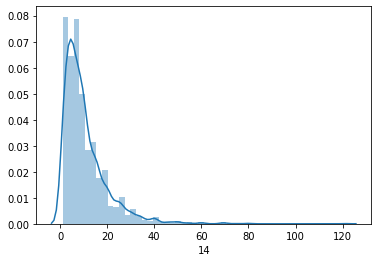

In [33]:
sns.distplot(train_df[14]) #room_count

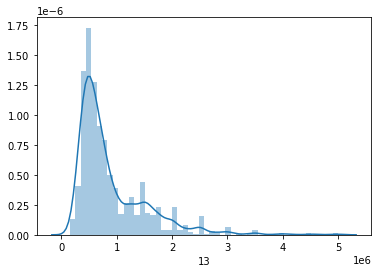

In [34]:
sns.distplot(train_df[13]) #price_monthly

In [0]:
def detect_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1
    rub = q3 + 1.5*iqr
    rlb = q1 - 1.5*iqr

    outlier = (data[column] < rlb) | (data[column] > rub)
    
    return data[outlier]

In [36]:
detect_outlier(train_df, 13)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
8,9.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4835.0,8490.0,3618.0,20.00,4000000.0,8.0,4.0,0.0
55,56.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3213.0,9851.0,1513.0,20.00,3000000.0,2.0,6.0,2.0
62,63.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1384.0,9025.0,2124.0,36.00,2800000.0,33.0,18.0,2.0
69,70.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2403.1,9851.0,1513.0,12.00,2500000.0,3.0,7.0,2.0
160,161.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3732.0,8863.0,6016.0,16.00,4500000.0,6.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,2962.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1926.0,11179.0,791.0,9.03,2500000.0,4.0,5.0,0.0
3079,3080.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3371.0,7739.0,5417.0,20.00,2300000.0,7.0,12.0,2.0
3080,3081.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3313.0,7648.0,5319.0,20.00,2500000.0,7.0,14.0,2.0
3265,3266.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2210.0,11298.0,649.0,18.00,3000000.0,1.0,16.0,0.0


In [37]:
train_df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3.293000e+03,3293.000000,3293.000000,3293.000000
mean,1647.000000,0.261585,0.609748,0.457060,0.562527,0.640389,0.426237,0.004585,0.517522,4672.001367,9917.847586,4898.683207,12.142792,8.987743e+05,10.502733,35.362587,0.660188
std,950.751545,0.436965,0.484341,0.494511,0.491902,0.475355,0.490707,0.067368,0.495128,3546.146252,4678.764967,3590.154757,4.905552,6.439386e+05,9.480271,47.269615,0.771365
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000,0.000000
25%,824.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2380.000000,7911.000000,2706.000000,9.000000,5.000000e+05,4.000000,8.000000,0.000000
50%,1647.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3959.000000,9254.000000,3921.000000,12.000000,6.500000e+05,8.000000,20.000000,0.000000
75%,2470.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5888.000000,12414.000000,6044.000000,12.250000,1.200000e+06,14.000000,44.000000,1.000000
max,3293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000,2.000000


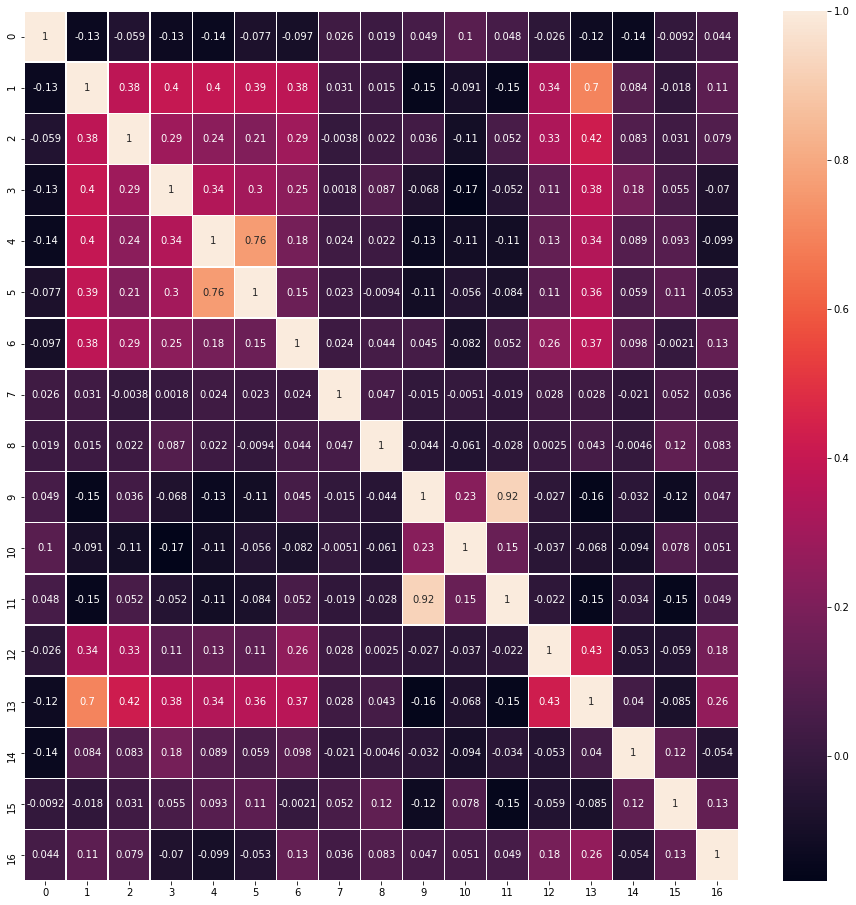

In [38]:
plt.figure(figsize = (16,16))
ax = sns.heatmap(train_df.corr(), annot=True, linewidths=.5)

In [0]:
train_features = train_df.loc[:,1:15]
y = train_df.loc[:,16:] # train_label

In [40]:
train_features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.0000,1500000.0,6.0,72.0
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.7,4548.0,9332.0,6867.0,12.0000,1500000.0,30.0,56.0
2,1.0,0.7,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.0000,1600000.0,20.0,109.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.2500,1500000.0,15.0,54.0
4,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.8500,2100000.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,10.5000,1600000.0,11.0,21.0
3289,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,18.9600,2200000.0,2.0,1.0
3290,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,21.2000,2500000.0,1.0,18.0
3291,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1669.0,10065.0,3994.0,10.5625,400000.0,21.0,181.0


In [0]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(train_features)
# X

In [42]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(train_features, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(2634, 15) (329, 15) (330, 15) (2634, 1) (329, 1) (330, 1)


In [0]:
# from keras import Sequential
# from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=15))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [51]:
history = classifier.fit(X_train,y_train, batch_size=10, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 3/100
264/264 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251 - val_loss: nan - val_accuracy: 0.5258
Epoch 8/100
264/264 [====================

In [52]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

83/83 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5251


[nan, 0.5250569581985474]

In [53]:
classifier.evaluate(X_test, y_test)[1]

11/11 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5242


0.5242424011230469

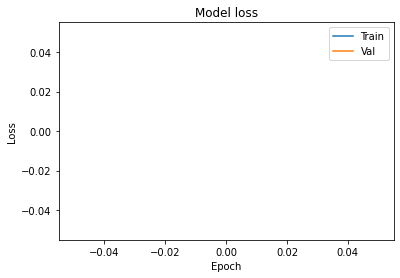

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

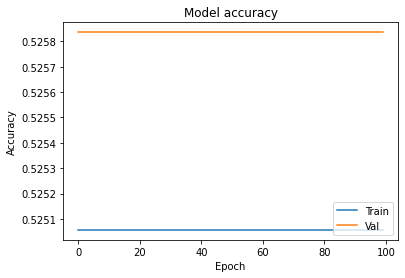

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()